In [1]:
from astrosite_dataset import ClassificationAstrositeDataset, TrackingAstrositeDataset, SpectrogramDataset
from classification_network import LeNet5
import os

dataset_path = '../filtered_dataset/recordings'
assert os.path.isdir(dataset_path)

target_list = ['50574', '47851', '37951', '39533', '43751', '32711', '27831', '45465',
       '46826', '42942', '42741', '41471', '43873', '40982', '41725', '43874', 
       '27711', '40892', '50005', '44637']

train_dataset = SpectrogramDataset(dataset_path, split=target_list, test=False)
test_dataset = SpectrogramDataset(dataset_path, split=target_list, test=True)

/home/ubuntu/miniconda3/envs/satellite/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Using  cuda
torch.Size([1, 513, 223])
392


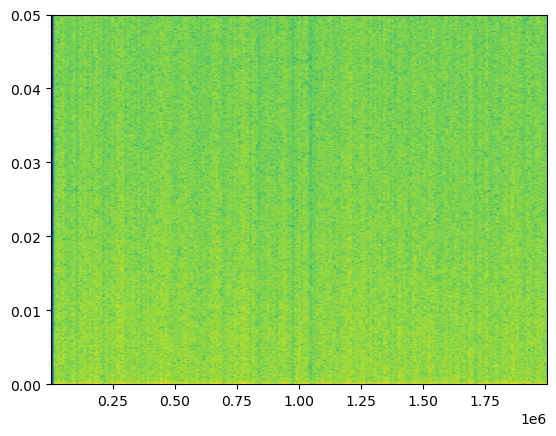

In [12]:
import torch
import sys

# Device will determine whether to run the training on GPU or CPU.
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Using ", device)
batch_size = 80
num_classes = len(target_list)
net = LeNet5(num_classes).to(device)
model_filename = "./networks/classification.pt"
learning_rate = 0.001
num_epochs = 10
cost = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)

print(train_dataset[0][0].shape)
print(len(train_dataset))

train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                           batch_size = batch_size,
                                           shuffle = True,
                                           num_workers = 4)

test_loader = torch.utils.data.DataLoader(dataset = test_dataset,
                                           batch_size = batch_size,
                                           shuffle = True,
                                           num_workers = 4)

In [ ]:
total_step_train = len(train_loader)
total_step_test = len(test_loader)

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        print(i)
        images = images.to(device)
        labels = labels.to(device)
        
        #Forward pass
        outputs = net(images)
        loss = cost(outputs, labels)
        	
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if (i+1) % 10 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
        		           .format(epoch+1, num_epochs, i+1, total_step_train, loss.item()))
        sys.stdout.flush()
    for j, (images, labels) in enumerate(test_loader):  
        images = images.to(device)
        labels = labels.to(device)
        
        #Forward pass
        outputs = net(images)
        loss = cost(outputs, labels)
        	
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if (i+1) % 10 == 0:
            print('Test: epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
        		           .format(epoch+1, num_epochs, j+1, total_step_test, loss.item()))
        sys.stdout.flush()
    torch.save(net.state_dict(), model_filename)

In [5]:
from astrosite_dataset import ClassificationAstrositeDataset, TrackingAstrositeDataset, SpectrogramDataset
from classification_network import LeNet5
import os

dataset_path = '../filtered_dataset/recordings'
assert os.path.isdir(dataset_path)

target_list = ['50574', '47851', '37951', '39533', '43751', '32711', '27831', '45465',
       '46826', '42942'] #, '42741', '41471', '43873', '40982', '41725', '43874', 
       #'27711', '40892', '50005', '44637']

train_dataset = SpectrogramDataset(dataset_path, split=target_list, test=False)
test_dataset = SpectrogramDataset(dataset_path, split=target_list, test=True)
print(len(train_dataset)+len(test_dataset))

228


In [2]:
import numpy as np
import torch
import sys
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

model = LeNet5(len(target_list))
model.load_state_dict(torch.load("./networks/classification_easy.pt"))
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Using ", device)
model.eval()
model.to(device)

Using  cuda


LeNet5(
  (layer1): Sequential(
    (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(2, 2))
    (1): BatchNorm2d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(6, 16, kernel_size=(5, 5), stride=(2, 2))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc): Linear(in_features=6448, out_features=1000, bias=True)
  (relu): ReLU()
  (fc1): Linear(in_features=1000, out_features=200, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=200, out_features=10, bias=True)
)

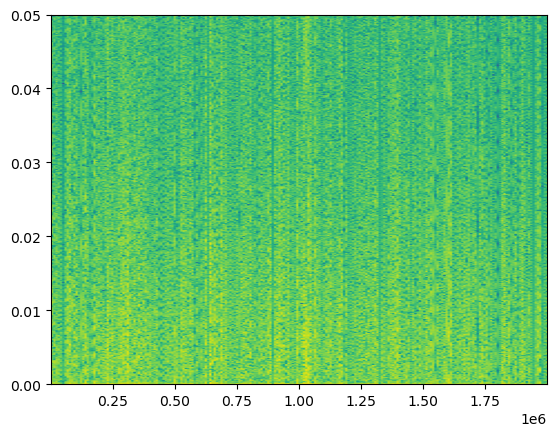

In [3]:
first = test_dataset[0]

torch.Size([10])
torch.Size([1, 10])
torch.Size([10])
torch.Size([1, 10])
torch.Size([10])
torch.Size([1, 10])
torch.Size([10])
torch.Size([1, 10])
torch.Size([10])
torch.Size([1, 10])


/home/ubuntu/miniconda3/envs/satellite/lib/python3.11/site-packages/matplotlib/axes/_axes.py:8089: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


torch.Size([10])
torch.Size([1, 10])
torch.Size([10])
torch.Size([1, 10])
torch.Size([10])
torch.Size([1, 10])
torch.Size([10])
torch.Size([1, 10])
torch.Size([10])
torch.Size([1, 10])
torch.Size([10])
torch.Size([1, 10])
torch.Size([10])
torch.Size([1, 10])
torch.Size([10])
torch.Size([1, 10])
torch.Size([10])
torch.Size([1, 10])
torch.Size([10])
torch.Size([1, 10])
torch.Size([10])
torch.Size([1, 10])
torch.Size([10])
torch.Size([1, 10])
torch.Size([10])
torch.Size([1, 10])
torch.Size([10])
torch.Size([1, 10])
torch.Size([10])
torch.Size([1, 10])
torch.Size([10])
torch.Size([1, 10])
torch.Size([10])
torch.Size([1, 10])
torch.Size([10])
torch.Size([1, 10])
torch.Size([10])
torch.Size([1, 10])
torch.Size([10])
torch.Size([1, 10])
torch.Size([10])
torch.Size([1, 10])
torch.Size([10])
torch.Size([1, 10])
torch.Size([10])
torch.Size([1, 10])
torch.Size([10])
torch.Size([1, 10])
torch.Size([10])
torch.Size([1, 10])
torch.Size([10])
torch.Size([1, 10])
torch.Size([10])
torch.Size([1, 10])
t

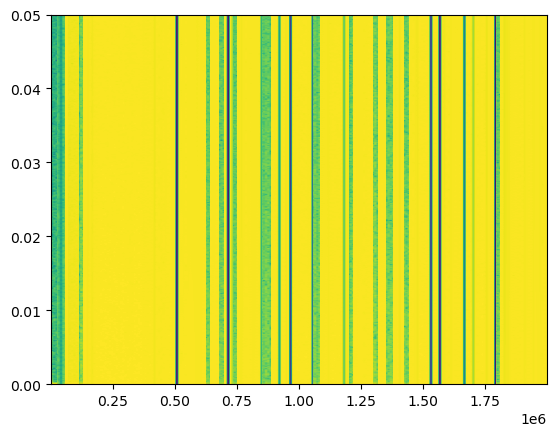

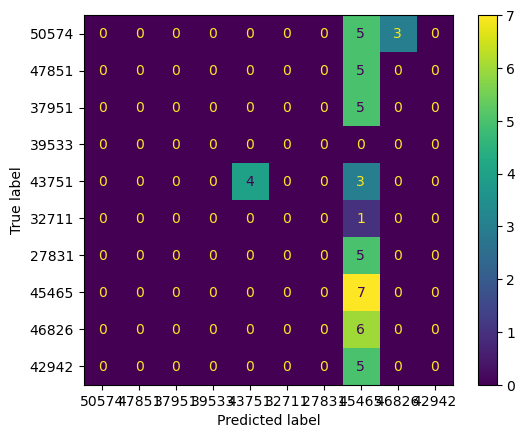

In [4]:
confusion_matrix = np.zeros((len(target_list), len(target_list)))
with torch.no_grad():
    for (events, satellite) in test_dataset:
        labels = satellite.to(device)
        
            
        #Forward pass
        outputs = model((events.unsqueeze(0)).to(device))
        gt_output = torch.argmax(labels)
        pred_output = torch.argmax(outputs)
        confusion_matrix[gt_output][pred_output] +=1
   


disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=target_list)
disp.plot()

plt.show()